# PROBLEM STATEMENT

The objective of this project is to build a predictive model that can accurately predict customer satisfaction with an airline based on various features. The dataset used for this analysis contains information about airline customers, their flight details, and feedback on their satisfaction.
The problem can be framed as a binary classification task, where the goal is to classify customers into two categories: satisfied and dissatisfied. The model will utilize a set of input features such as flight distance, seat comfort, inflight entertainment, cleanliness, customer service, and others to predict whether a customer is satisfied or dissatisfied.

The airline wants to leverage this predictive model to identify factors that contribute to customer satisfaction and take necessary actions to improve their services. By accurately predicting customer satisfaction, the airline can proactively address customer concerns, enhance customer experience, and make data-driven decisions to optimize their operations.

# Dataset description

Satisfaction:  This column represents the customer's satisfaction level with their overall flight experience. It is a categorical variable with two possible values: "satisfied" or "neutral or dissatisfied".

Gender: This column indicates the gender of the customer. It is a categorical variable with two possible values: "Male" or "Female".

Customer Type: This column categorizes the customers based on their type. It is a categorical variable with two possible values: "Loyal Customer" or "Disloyal Customer".

Age: This column represents the age of the customer. It is a numerical variable denoted in years.

Type of Travel: This column indicates the purpose of the customer's travel. It is a categorical variable with two possible values: "Business travel" or "Personal travel".

Class: This column represents the class of service the customer availed. It is a categorical variable with three possible values: "Eco", "Eco Plus", or "Business".

Flight Distance: This column denotes the distance of the flight in miles. It is a numerical variable.

Seat comfort: This column represents the customer's satisfaction with the seat comfort. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Departure/Arrival time convenient: This column denotes the customer's satisfaction with the convenience of the departure and arrival times. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Food and drink: This column represents the customer's satisfaction with the food and drink provided during the flight. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Gate location: This column denotes the customer's satisfaction with the gate location. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Inflight wifi service: This column represents the customer's satisfaction with the inflight wifi service. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Inflight entertainment: This column denotes the customer's satisfaction with the inflight entertainment options. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Online support: This column represents the customer's satisfaction with the online customer support. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Ease of Online booking: This column denotes the customer's satisfaction with the ease of online booking. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

On-board service: This column represents the customer's satisfaction with the on-board service provided by the airline. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Leg room service: This column denotes the customer's satisfaction with the leg room provided during the flight. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Baggage handling: This column represents the customer's satisfaction with the airline's baggage handling. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Check-in service: This column denotes the customer's satisfaction with the airline's check-in service. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Cleanliness: This column represents the customer's satisfaction with the cleanliness of the aircraft. It is a numerical     
variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Online boarding: This column denotes the customer's satisfaction with the online boarding process. It is a numerical variable, measured on a scale from 0 to 5, where higher values indicate greater satisfaction.

Departure Delay in Minutes: This column represents the duration of the departure delay in minutes for each flight. It is a numerical variable.

Arrival Delay in Minutes: This column denotes the duration of the arrival delay in minutes for each flight. It is a numerical   variable.

In [1]:
import pandas as pd  
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder, StandardScaler  
from sklearn.model_selection import train_test_split, KFold, cross_val_score 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, precision_recall_curve, auc 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
df=pd.read_csv("Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [5]:
df.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')

In [6]:
df.shape

(129880, 23)

In [7]:
df.size

2987240

# checking missing values

In [8]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [9]:
df.isnull().sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

# checking distinct columns

In [11]:
for column in df.columns:                                         
    print(df[column].value_counts())
    print('*'*20)

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64
********************
Female    65899
Male      63981
Name: Gender, dtype: int64
********************
Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64
********************
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64
********************
Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64
********************
Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64
********************
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: Flight Distance, Length: 5398, dtype: int64
********************
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: Seat comfort, dtype: int64
********************
4    29593
5  

In [12]:
df['Departure Delay in Minutes'].nunique()

466

In [13]:
df['Departure Delay in Minutes'].value_counts()/len(df['Departure Delay in Minutes'])*100

0      56.479828
1       2.834925
2       2.198183
3       1.951802
4       1.777795
         ...    
366     0.000770
569     0.000770
419     0.000770
411     0.000770
320     0.000770
Name: Departure Delay in Minutes, Length: 466, dtype: float64

In [14]:
df["satisfaction"].value_counts()/len(df["satisfaction"])*100

satisfied       54.73283
dissatisfied    45.26717
Name: satisfaction, dtype: float64

observation: The data is considerably balanced.

In [15]:
categorical_features= df.select_dtypes(include=['object'])
categorical_features.columns

Index(['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class'], dtype='object')

In [16]:
numerical_features = df.select_dtypes(include=['int', 'float'])
print(numerical_features.columns)

Index(['Age', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


In [17]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


observation:mean ratings for seat comfort,Departure/Arrival time convenient,Food and drink,Gate location are less

In [18]:
df.corr()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249625,0.008784,0.039055,0.015749,-0.000547,0.013965,0.130511,0.121201,0.071594,0.066704,0.083762,-0.015452,0.031845,-0.018271,0.037973,-0.009041,-0.011248
Flight Distance,-0.249625,1.000000,-0.042409,0.001350,-0.004649,-0.002409,0.012230,-0.027542,-0.032022,-0.022299,-0.032559,-0.030316,0.019768,0.002456,0.009432,0.009604,0.112555,0.110103
Seat comfort,0.008784,-0.042409,1.000000,0.434951,0.715997,0.405300,0.129131,0.426447,0.120278,0.211531,0.121149,0.136136,0.118489,0.041214,0.108475,0.130396,-0.023817,-0.025506
Departure/Arrival time convenient,0.039055,0.001350,0.434951,1.000000,0.527381,0.544259,-0.001974,0.077203,-0.000546,0.001755,0.060446,0.029422,0.067396,0.062794,0.067126,-0.000623,0.004395,0.002599
Food and drink,0.015749,-0.004649,0.715997,0.527381,1.000000,0.523328,0.025917,0.367669,0.028554,0.041189,0.038646,0.074161,0.036370,0.011898,0.033416,0.013587,-0.013433,-0.014881
Gate location,-0.000547,-0.002409,0.405300,0.544259,0.523328,1.000000,-0.004086,-0.000280,0.002908,0.001442,-0.025132,-0.007407,-0.000401,-0.031859,-0.001705,-0.003043,0.003962,0.003640
Inflight wifi service,0.013965,0.012230,0.129131,-0.001974,0.025917,-0.004086,1.000000,0.253823,0.557340,0.601100,0.060794,0.033589,0.038251,0.092508,0.038263,0.631786,-0.032900,-0.035270
Inflight entertainment,0.130511,-0.027542,0.426447,0.077203,0.367669,-0.000280,0.253823,1.000000,0.441957,0.321731,0.183912,0.160731,0.117213,0.224120,0.109451,0.355714,-0.030491,-0.033321
Online support,0.121201,-0.032022,0.120278,-0.000546,0.028554,0.002908,0.557340,0.441957,1.000000,0.617489,0.157930,0.138433,0.102444,0.206824,0.095726,0.669843,-0.034018,-0.036087
Ease of Online booking,0.071594,-0.022299,0.211531,0.001755,0.041189,0.001442,0.601100,0.321731,0.617489,1.000000,0.436264,0.355122,0.398322,0.137744,0.417675,0.684320,-0.036545,-0.039806


Departure Delay in Minutes and Arrival delay in minutes are highly correlated so we drop one of them arrival delay in minutes.

# Univariate analysis

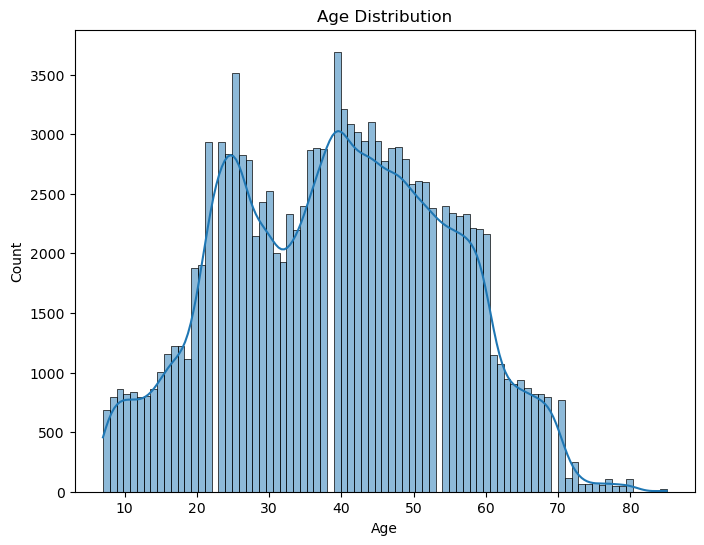

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

In [20]:
df['Age'].skew()

-0.003606211745335886

OBSERVATION: the data is almost normally distributed.

<AxesSubplot:xlabel='Age'>

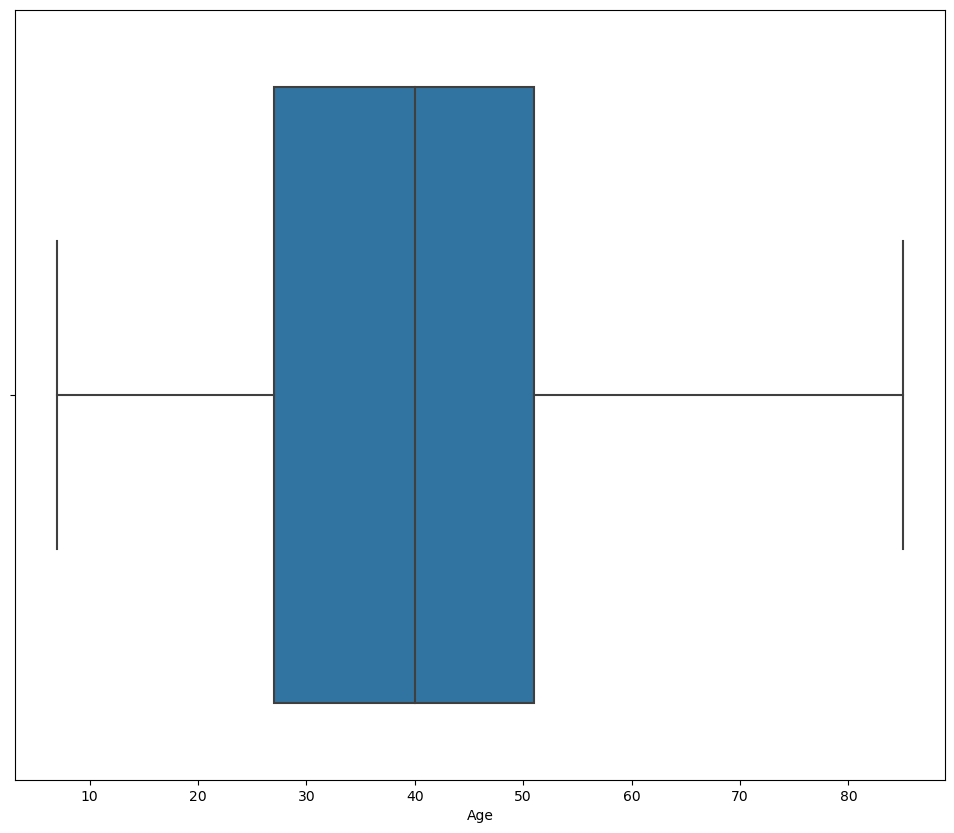

In [21]:
plt.rcParams["figure.figsize"] = (12,10)

sns.boxplot(x=df['Age'])

OBSERVATION:no outlier visualised in age column.

<AxesSubplot:xlabel='Flight Distance', ylabel='Count'>

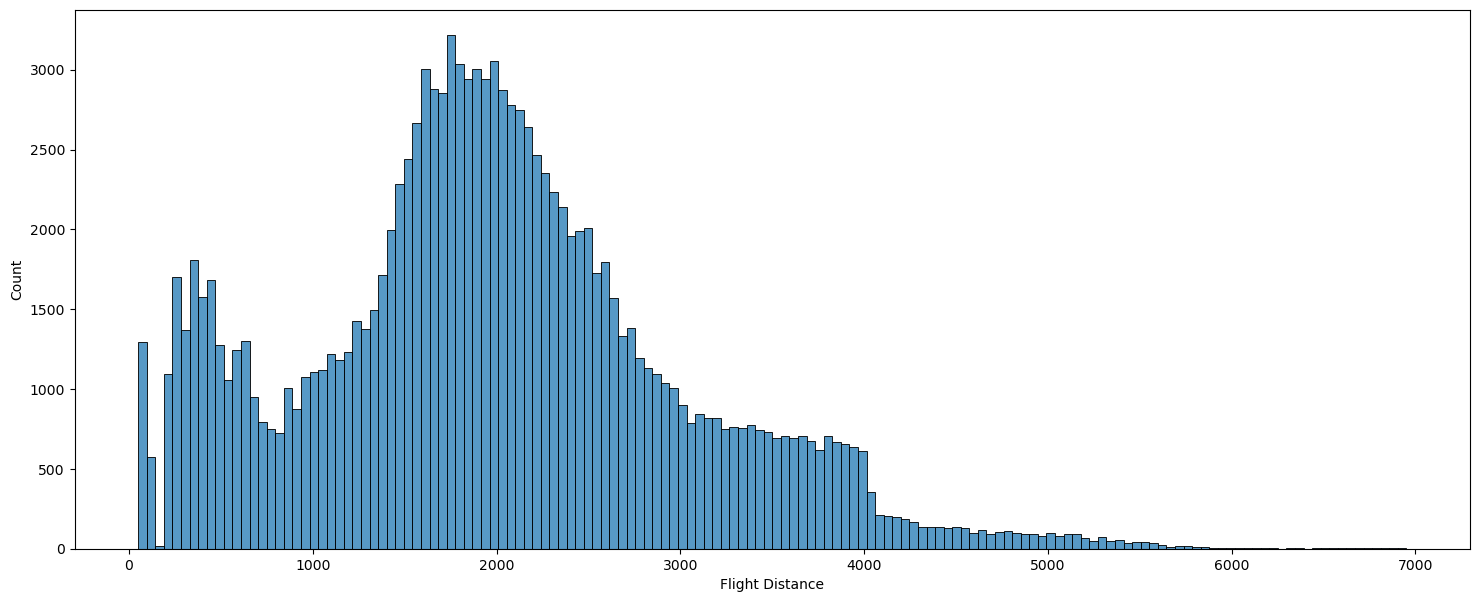

In [22]:
plt.rcParams["figure.figsize"] = (18,7)

sns.histplot(x=df['Flight Distance'])

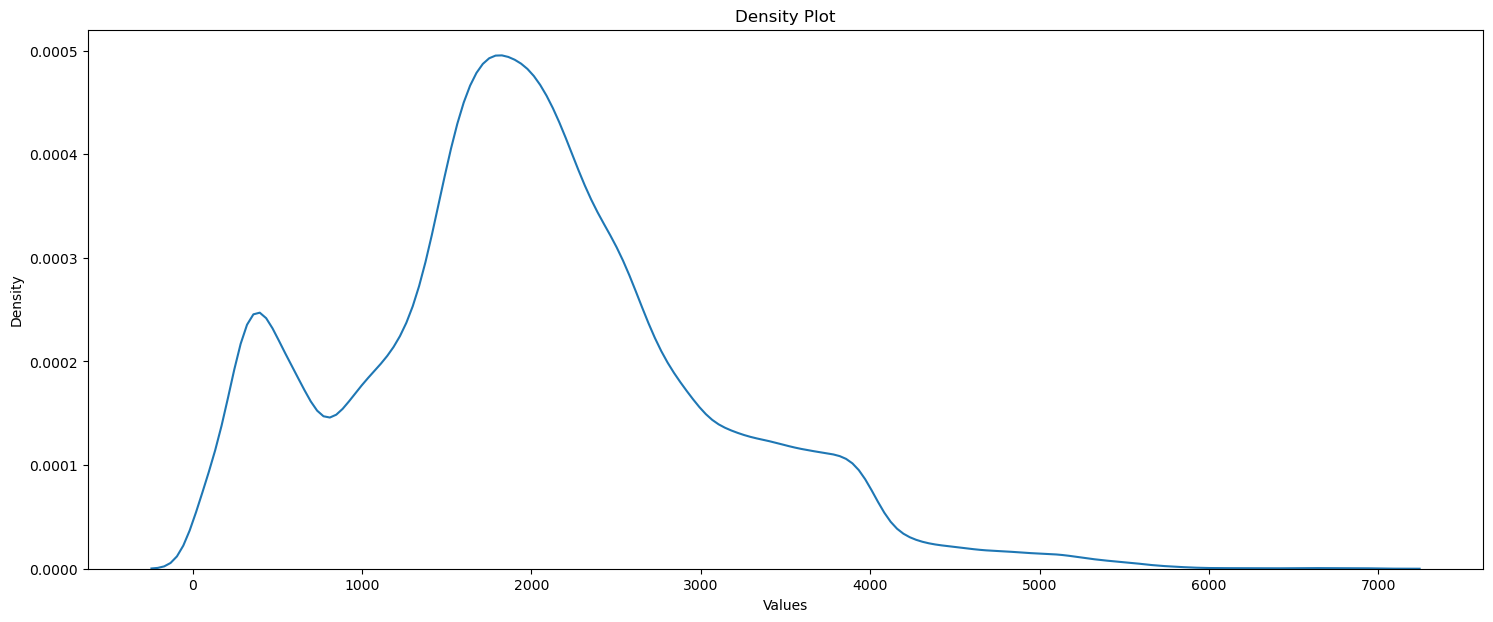

In [23]:
sns.kdeplot(df['Flight Distance'])

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

In [24]:
df["Flight Distance"].skew()

0.4667475218666149

observation:the data is positively skewed.

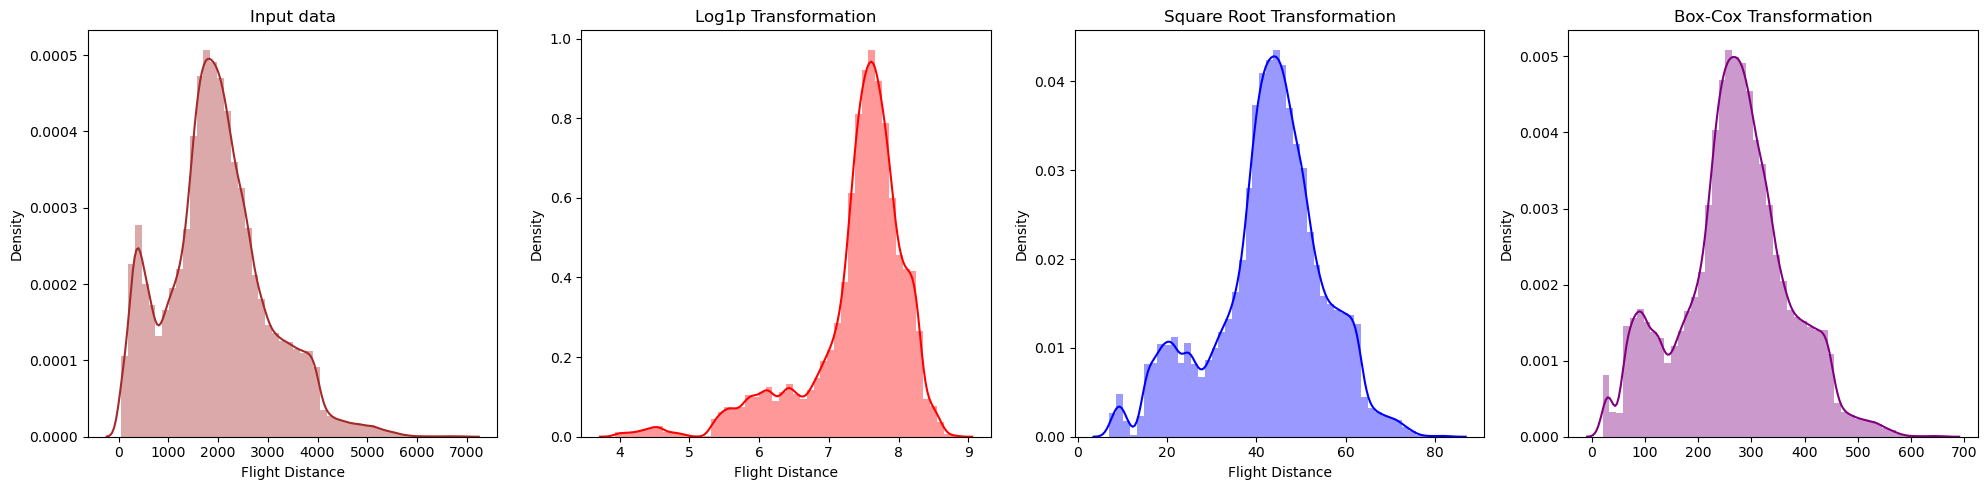

In [25]:
import scipy.stats as stats 
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.distplot(df['Flight Distance'], ax=axes[0], color='brown')
axes[0].set_title("Input data")

sns.distplot(np.log1p(df['Flight Distance'] + 0.000001), ax=axes[1], color='red')
axes[1].set_title("Log1p Transformation")

sns.distplot(np.sqrt(df['Flight Distance']), ax=axes[2], color='blue')
axes[2].set_title("Square Root Transformation")

sns.distplot(stats.boxcox(df['Flight Distance'] + 1)[0], ax=axes[3], color='purple')
axes[3].set_title("Box-Cox Transformation")

plt.tight_layout()
plt.show()

observation:log transformation would be better for flight distance column if needed

<AxesSubplot:xlabel='Flight Distance'>

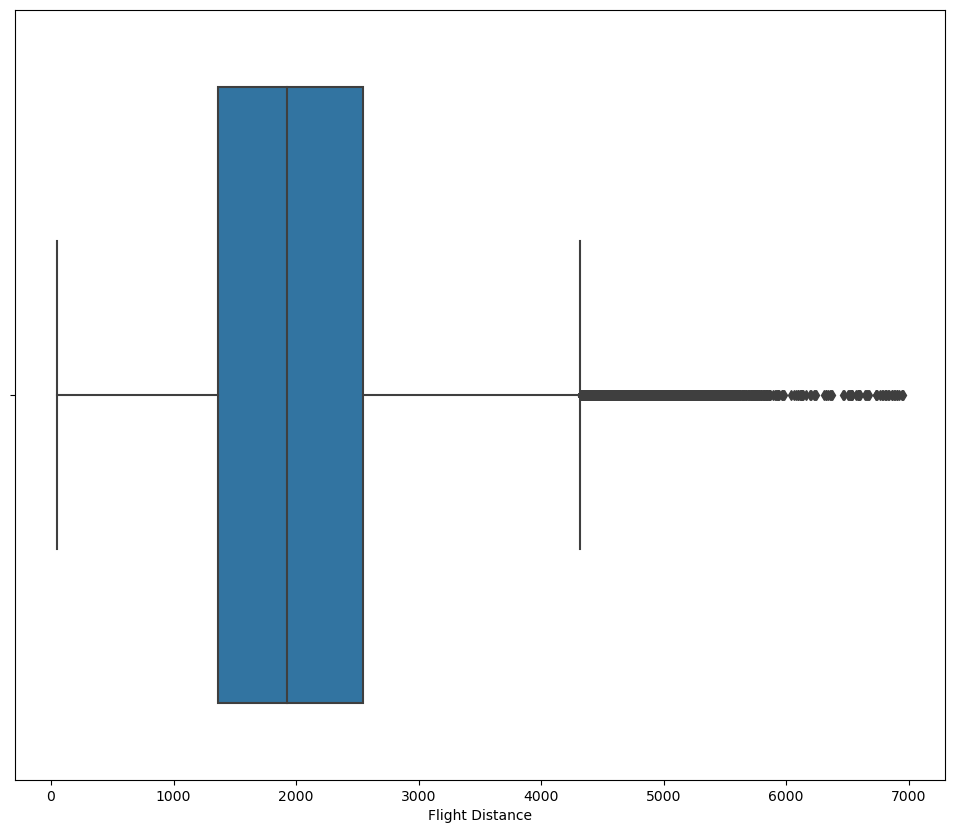

In [26]:
plt.rcParams["figure.figsize"] = (12,10)

sns.boxplot(x=df['Flight Distance'])

observation:outliers are visualied beyond the max value.

<AxesSubplot:xlabel='Departure Delay in Minutes'>

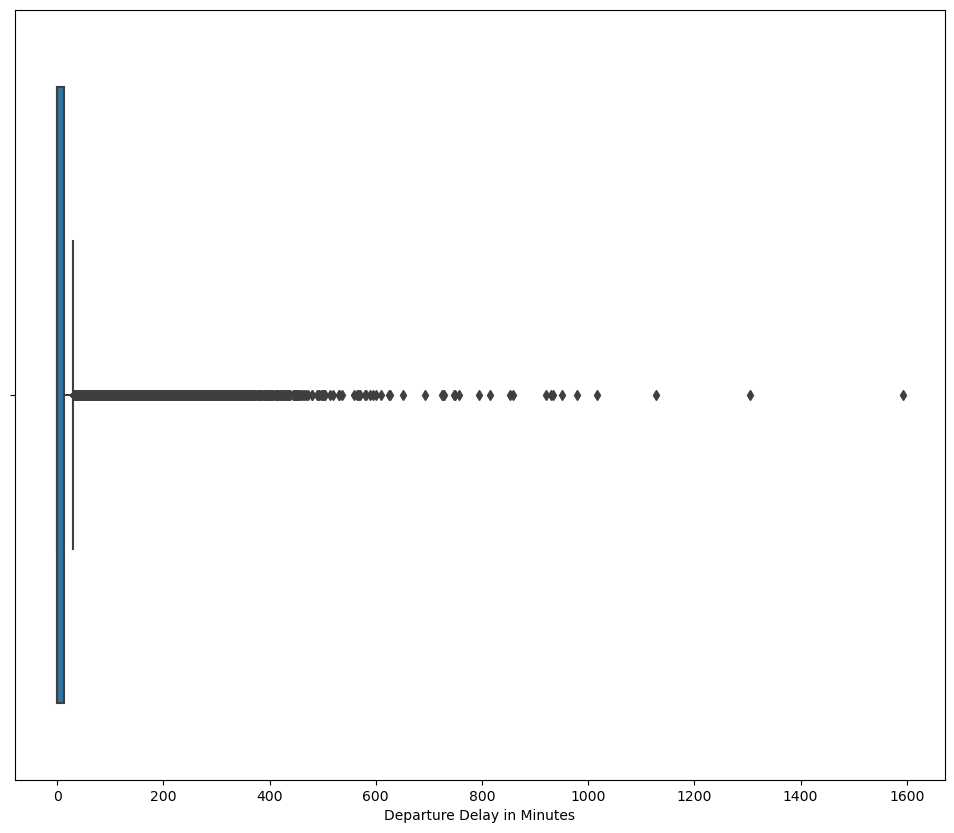

In [27]:
plt.rcParams["figure.figsize"] = (12,10)

sns.boxplot(x=df['Departure Delay in Minutes'])

# 

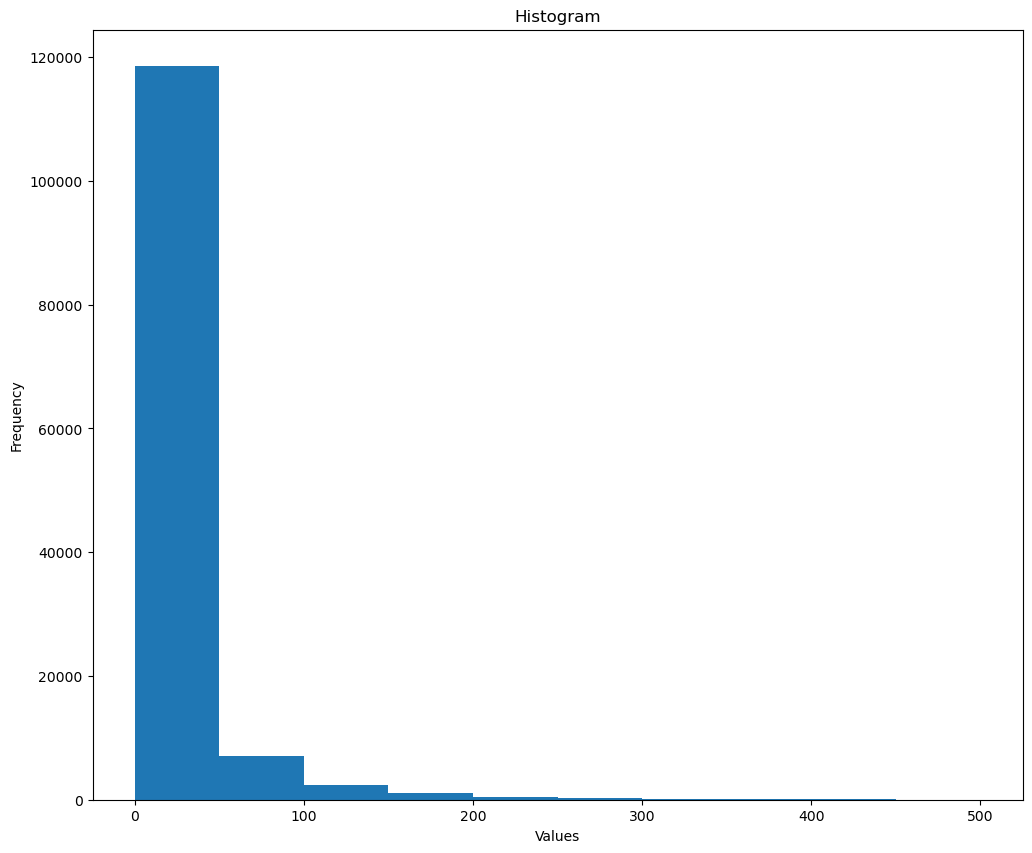

In [28]:
plt.hist(df['Departure Delay in Minutes'], range=(0,500))  # Adjust the range as needed

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [29]:
df['Departure Delay in Minutes'].skew()

6.821980310173458

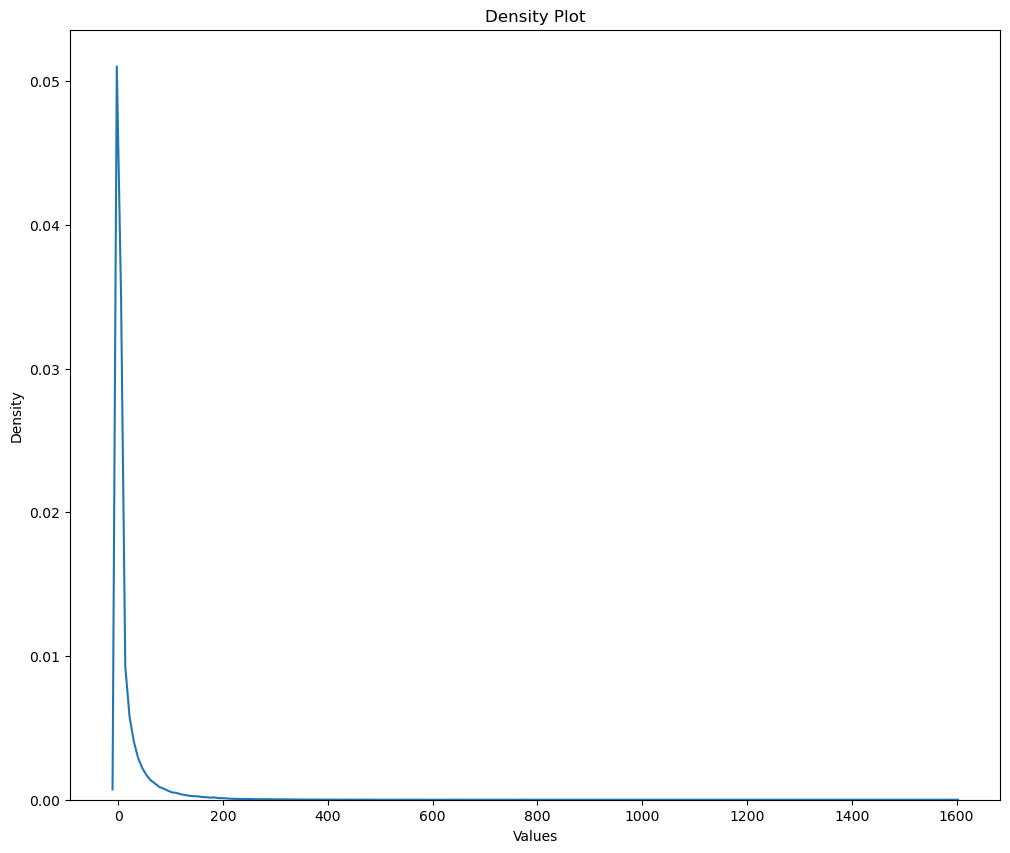

In [30]:
sns.kdeplot(df['Departure Delay in Minutes'])


plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Density Plot')
plt.show()

observation:majority of the values are 0 so a lot of outliers visualised but all are practically possible.

# BIVARIATE ANALYSIS

<AxesSubplot:>

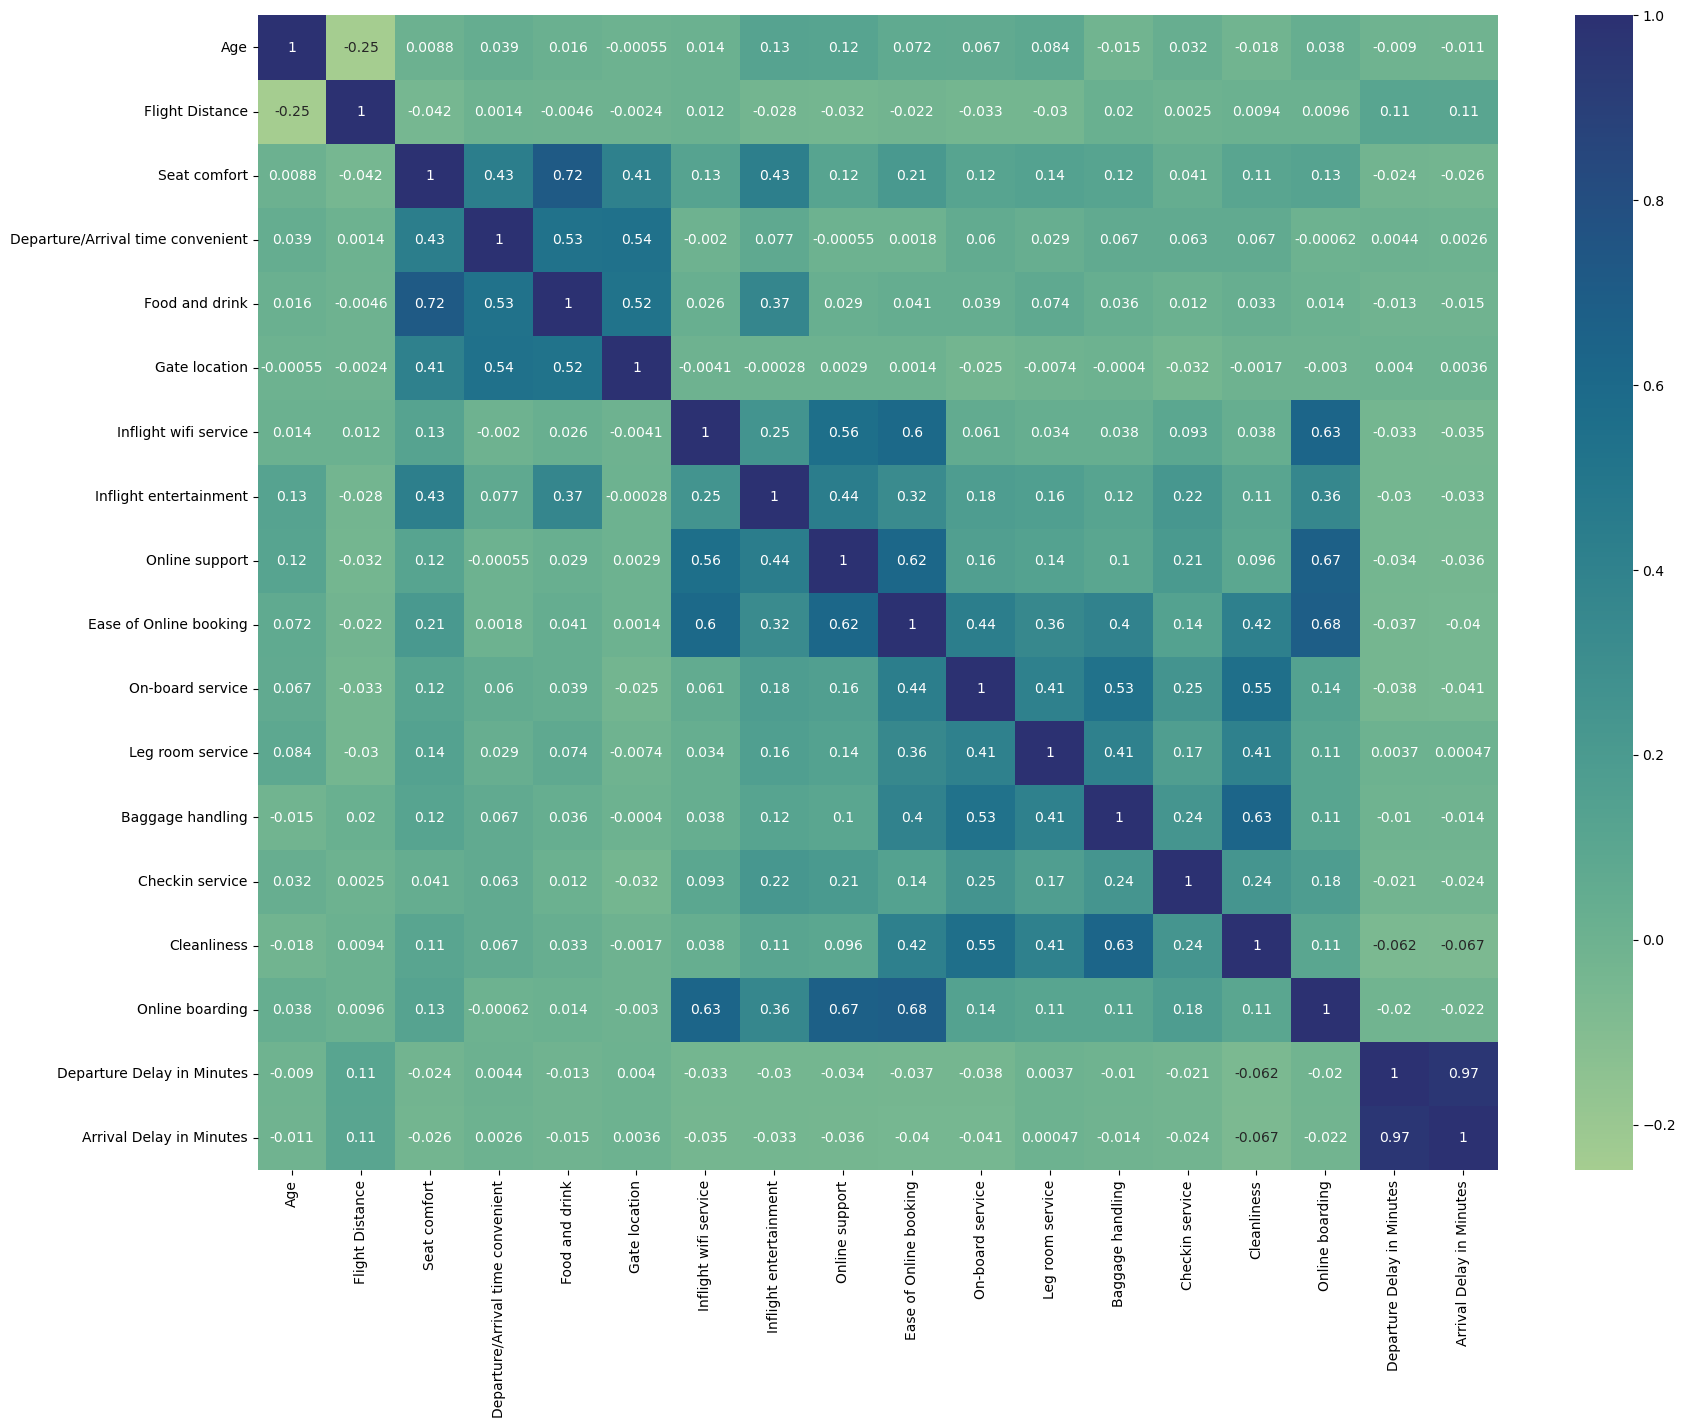

In [31]:
 plt.figure(figsize=(20,15))

sns.heatmap(df.corr(),annot=True,cmap='crest')   

observation:Departure Delay in Minutes and Arrival delay in minutes are highly correlated so we drop one of them arrival delay               in minutes.

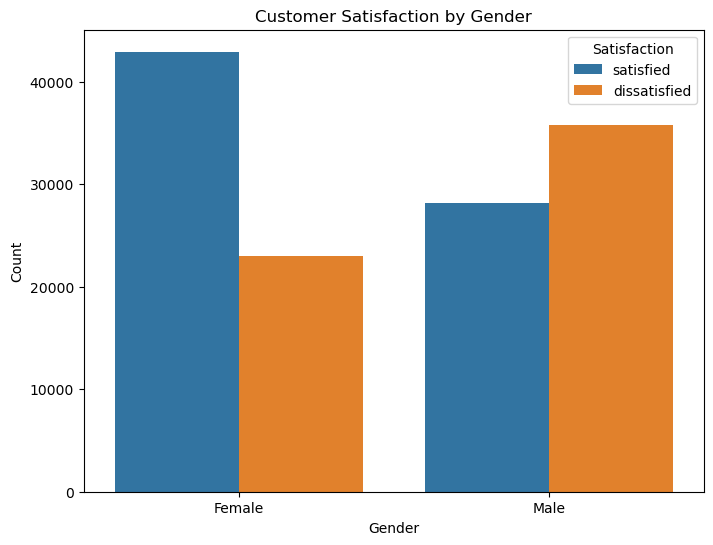

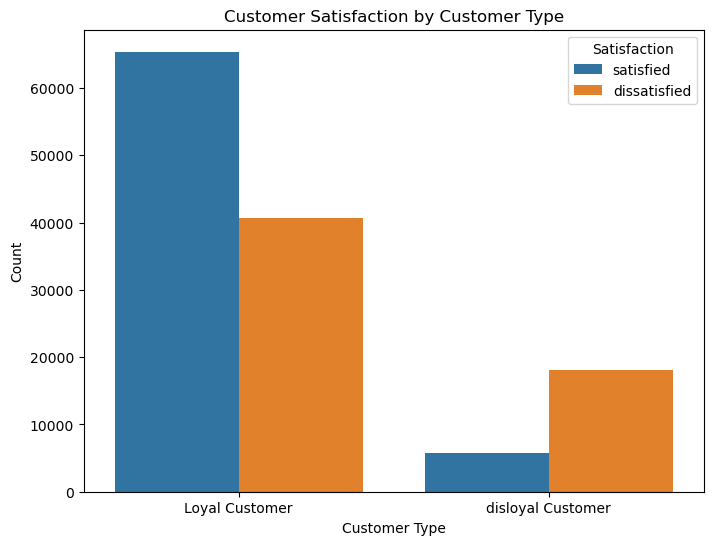

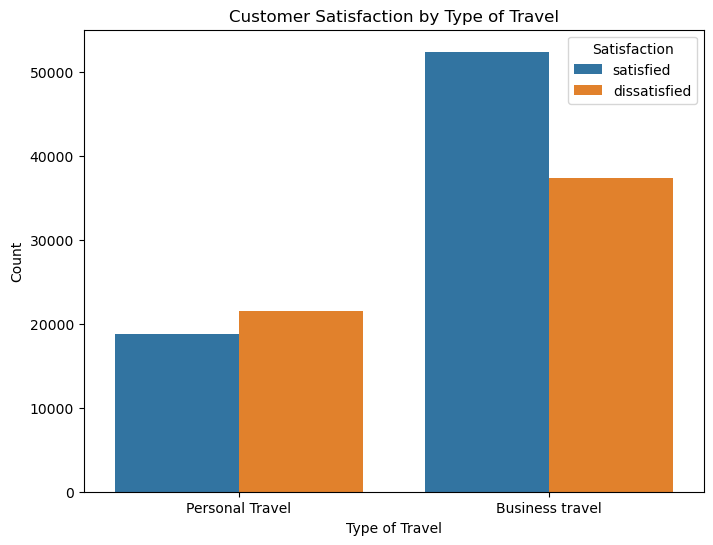

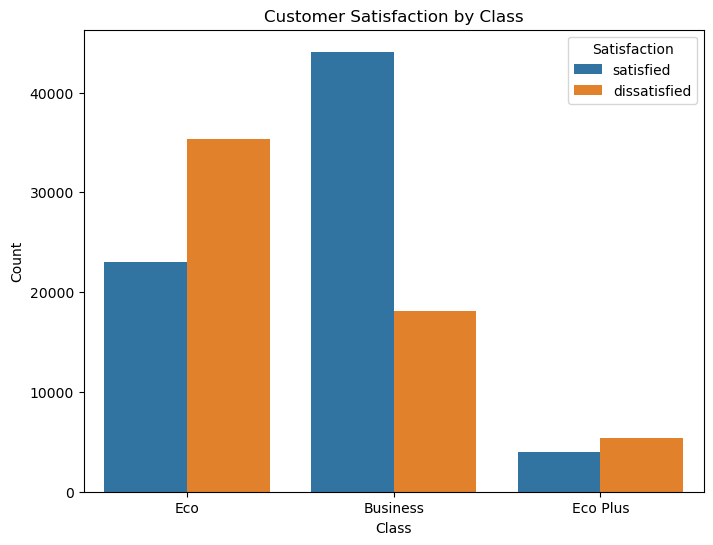

In [32]:
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']


for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='satisfaction')
    plt.title('Customer Satisfaction by {}'.format(col))
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Satisfaction', loc='upper right')
    plt.show()

OBSERVATIONS: 1.The analysis show a significant difference in satisfaction level on the basis of gender.Females tend to be more                 satisfied than the male passengers.
              2.The analysis show a significant difference in satisfaction level on the basis of loyalty of the                                 customers.Disloyal customers tend to be dissatisfied than the loyal customers.
              3.The analysis show a significant difference in satisfaction level on the basis of class of the passengers flying.
                the proportion of dissatisfied customers are less in business class followed by economy plus and highest in                     economy class.

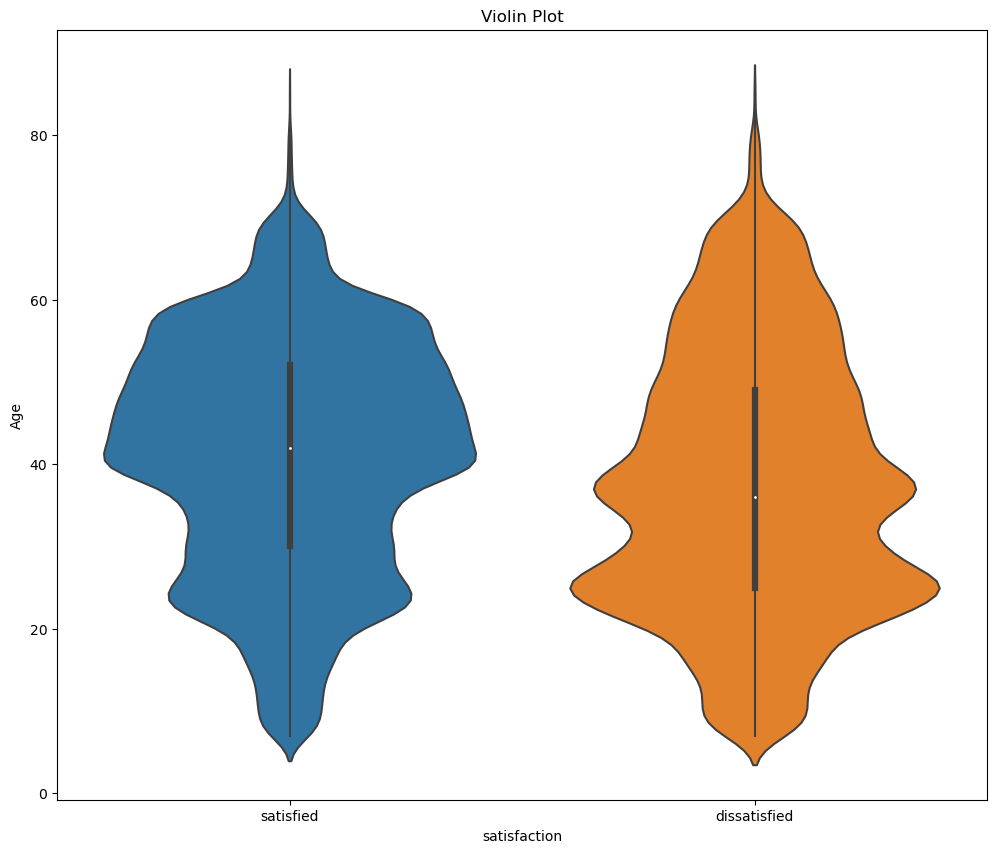

In [33]:
sns.violinplot(x='satisfaction', y='Age', data=df)
plt.xlabel('satisfaction')
plt.ylabel('Age')
plt.title('Violin Plot')
plt.show()

observations: lower age customers are more dissatisfied customers than the older ones.

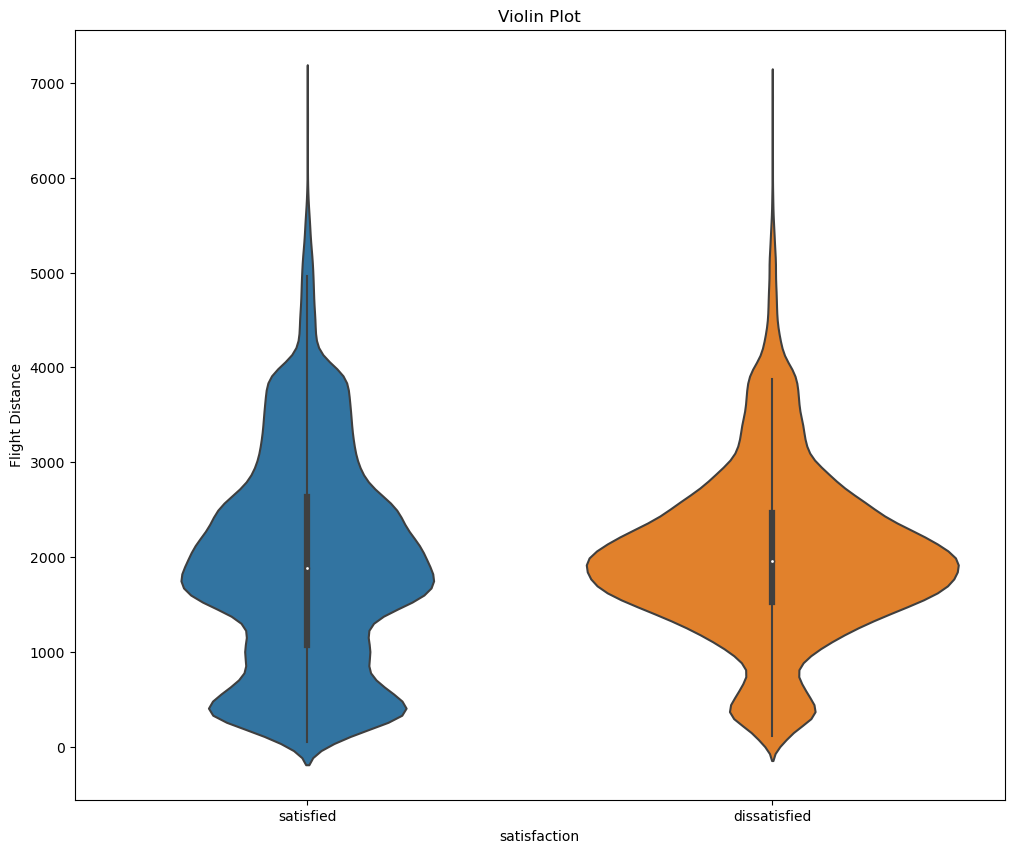

In [34]:
sns.violinplot(x='satisfaction', y='Flight Distance', data=df)
plt.xlabel('satisfaction')
plt.ylabel('Flight Distance')
plt.title('Violin Plot')
plt.show()

observations:most of the dissatisfied customers are from flights distance ranging from 1000 to 3000 km

In [35]:
# Grouping the dataframe by 'satisfaction' and calculating descriptive statistics and sum of departure delays
departure_delay_statistics = df.groupby('satisfaction')['Departure Delay in Minutes'].agg(['describe', 'sum'])

departure_delay_statistics

describe                                                     \
                count       mean        std  min  25%  50%   75%     max   
satisfaction                                                               
dissatisfied  58793.0  17.807749  43.513060  0.0  0.0  0.0  16.0  1592.0   
satisfied     71087.0  12.154768  32.676796  0.0  0.0  0.0   9.0  1305.0   

                                    sum  
             Departure Delay in Minutes  
satisfaction                             
dissatisfied                    1046971  
satisfied                        864046

observation: Direct correlation is there between the dissatisfaction and departure delay in minutes as Departure Delay in                   Minutes are more for dissatisfied customers.

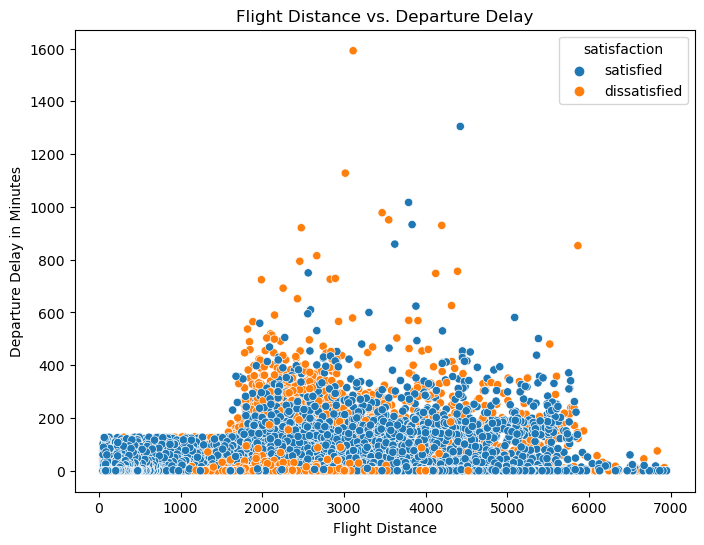

In [36]:
# Scatter plot of Flight Distance vs. Departure Delay in Minutes
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Flight Distance', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Flight Distance vs. Departure Delay')
plt.show()

observation:when the flight distance is less than 1500 km, there is either no delay or the delay is relatively minimal compared             to longer distances whereas if departure delay increase  with the increase in flight distance more passengers are               dissatisfied.

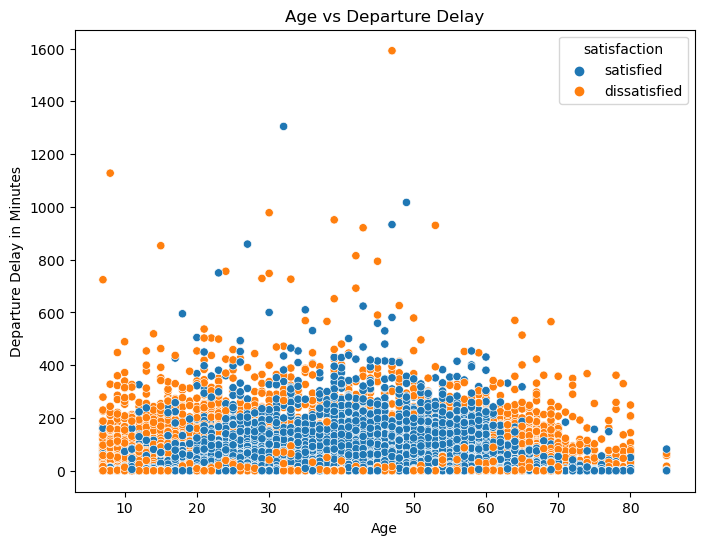

In [37]:
# Scatter plot of Flight Distance vs. Departure Delay in Minutes,segmented by satisfaction
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Departure Delay in Minutes', hue='satisfaction')
plt.title('Age vs Departure Delay')
plt.show()

observations: lower age people and old age people greater than 60 tend be more dissatisfied with the departure delays.

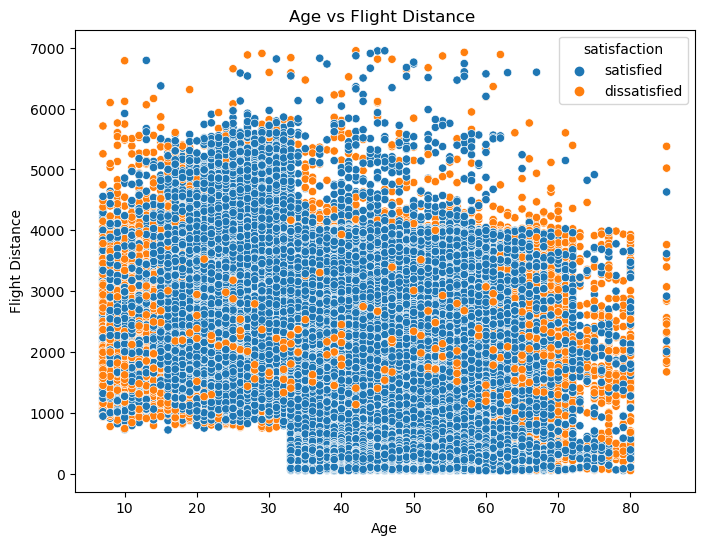

In [38]:
# Scatter plot of age vs Flight Distance ,segmented by satisfaction,segmented by satisfaction
plt.figure(figsize=(8, 6))

# Create a scatter plot of Flight Distance vs. Departure Delay in Minutes, segmented by satisfaction
sns.scatterplot(data=df, x='Age', y='Flight Distance', hue='satisfaction')

# Set the title of the plot
plt.title('Age vs Flight Distance ')

# Display the plot
plt.show()

# Data preprocessing

As Arrival Delay in Minutes and Departure Delay in Minutes are highly correlated so dropping the Arrival Delay in Minutes as insignificant.

In [39]:
df.drop('Arrival Delay in Minutes', axis=1, inplace=True)

In [40]:
df.head(2)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310


# outliers treatment

In [41]:
Q1 = df['Flight Distance'].quantile(0.25)
Q3 = df['Flight Distance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1185.0


In [42]:
ul= Q3 + 1.5 * IQR
ll= Q1 - 1.5 * IQR
outliers = df[(df['Flight Distance'] > ul) | (df['Flight Distance'] < ll)]
len(outliers)

2581

In [43]:
# Q1 = df['CoapplicantIncome'].quantile(0.25)
# Q3 = df['CoapplicantIncome'].quantile(0.75)
# IQR = Q3 - Q1

# # Define the range for outliers removal (e.g., 1.5 times the IQR)
# lower_range = Q1 - 1.5 * IQR
# upper_range = Q3 + 1.5 * IQR

# # Remove outliers from 'ApplicantIncome'
# df = df[(df['ApplicantIncome'] >= lower_range) & (df['ApplicantIncome'] <=upper_range)]

In [44]:
df['satisfaction'] = df['satisfaction'].map({'satisfied': 0, 'dissatisfied': 1})

In [45]:
y=df['satisfaction']
X=df.drop('satisfaction',axis=1)

In [46]:
y

0         0
1         0
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    1
Name: satisfaction, Length: 129880, dtype: int64

In [47]:
df_encoded = pd.get_dummies(X,drop_first=True)
df_encoded.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,3,5,3,2,0,0,0,1,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,4,2,3,2,310,1,0,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,4,4,4,2,0,0,0,1,1,0
3,60,623,0,0,0,3,3,4,3,1,...,1,4,1,3,0,0,0,1,1,0
4,70,354,0,0,0,3,4,3,4,2,...,2,4,2,5,0,0,0,1,1,0


In [48]:
X = df_encoded[['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service', 'Baggage handling', 'Cleanliness', 'Online boarding', 'Gender_Male', 'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel']]
y = df['satisfaction']
print(X.columns)
print(y)

Index(['Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Cleanliness', 'Online boarding', 'Gender_Male',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')
0         0
1         0
2         0
3         0
4         0
         ..
129875    0
129876    1
129877    1
129878    1
129879    1
Name: satisfaction, Length: 129880, dtype: int64


In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X[X.columns] = X_scaled
print(X)

        Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0             -1.671103     -2.037791                          -1.958230   
1              0.469852     -2.037791                          -1.958230   
2              0.152458     -2.037791                          -1.958230   
3             -1.322552     -2.037791                          -1.958230   
4             -1.584452     -2.037791                          -1.958230   
...                 ...           ...                                ...   
129875        -0.243799      1.551642                           1.315696   
129876         0.102804     -0.602018                           0.006125   
129877         0.329653      0.115869                          -1.958230   
129878         0.456222      0.115869                          -0.648660   
129879         2.264205      0.115869                           0.660911   

        Food and drink  Inflight entertainment  Online support  \
0            -1.97544

# Test train split

In [50]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (103904, 15)
X_test shape: (25976, 15)
y_train shape: (103904,)
y_test shape: (25976,)


# MODELLING

# LOGISTIC REGRESSION

In [51]:
#creating dictionary for storing different models accuracy
model_comparison={}

Training Accuracy: 0.83
Test Accuracy: 0.83
Precision: 0.81
Recall: 0.81
F1-score: 0.81
ROC AUC Score: 0.83


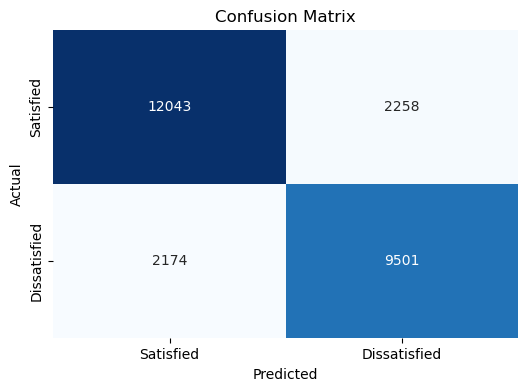

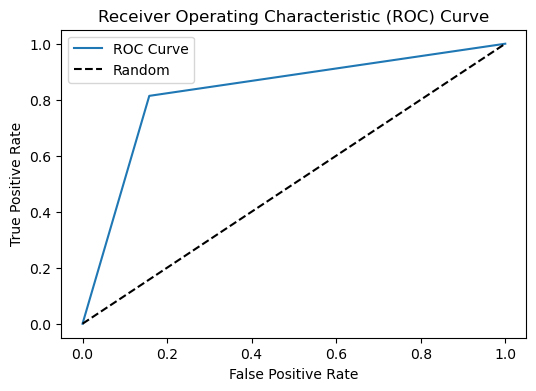

In [52]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Compute evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
roc_auc = round(roc_auc_score(y_test, y_pred), 2)
train_accuracy = round(logreg.score(X_train, y_train), 2)
test_accuracy = round(logreg.score(X_test, y_test), 2)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC Score:", roc_auc)


# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Satisfied', 'Dissatisfied'], yticklabels=['Satisfied', 'Dissatisfied'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
model_comparison['LogisticRegression']=[round(logreg.score(X_train, y_train), 2),round(logreg.score(X_test, y_test), 2),round(precision_score(y_test, y_pred), 2), round(recall_score(y_test, y_pred), 2),round(f1_score(y_test, y_pred), 2), round(roc_auc_score(y_test, y_pred), 2)]

# RANDOM FOREST CLASSIFIER

Training Accuracy: 0.966
Test Accuracy: 0.948
Precision: 0.94
Recall: 0.95
F1-score: 0.94
AUC-ROC Score: 0.95


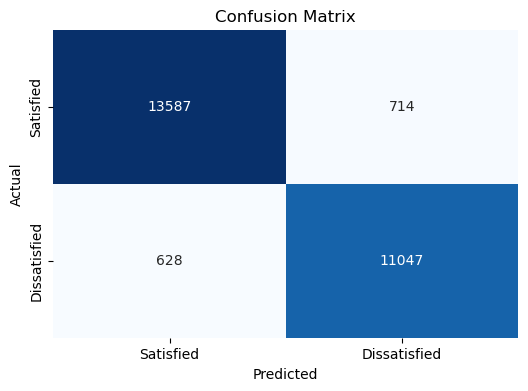

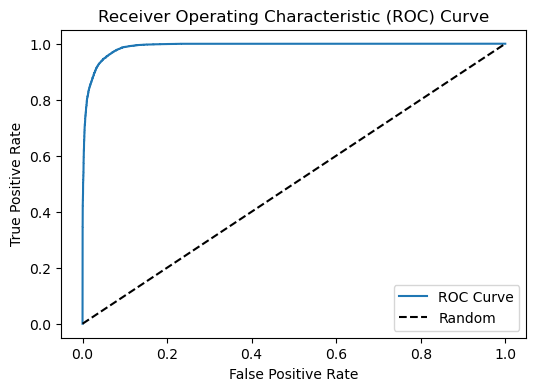

In [66]:
rf = RandomForestClassifier(n_estimators=112, max_depth=15, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Compute evaluation metrics
accuracy = round(accuracy_score(y_test, y_pred), 2)
precision = round(precision_score(y_test, y_pred), 2)
recall = round(recall_score(y_test, y_pred), 2)
f1 = round(f1_score(y_test, y_pred), 2)
auc_roc = round(roc_auc_score(y_test, y_pred), 2)
train_accuracy = round(rf.score(X_train, y_train), 3)
test_accuracy = round(rf.score(X_test, y_test), 3)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC Score:", auc_roc)


# Calculate the probabilities for the positive class
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Satisfied', 'Dissatisfied'], yticklabels=['Satisfied', 'Dissatisfied'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()
model_comparison['RandomForestClassifier']=[round(rf.score(X_train, y_train), 2),round(rf.score(X_test, y_test), 2),round(precision_score(y_test, y_pred), 2), round(recall_score(y_test, y_pred), 2),round(f1_score(y_test, y_pred), 2), round(roc_auc_score(y_test, y_pred), 2)]

# Hyperparameter Tuning using Optuna

In [54]:
import optuna

def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 2, 15)

    
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)

    auc_roc = roc_auc_score(y_val, y_pred)

    return auc_roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

best_params = study.best_params
best_auc_roc = study.best_value
print("Best Hyperparameters:", best_params)
print("Best AUC-ROC Score:", best_auc_roc)


[I 2023-06-26 17:01:54,230] A new study created in memory with name: no-name-e2b907c7-be1a-458f-8f84-faa635616124
[I 2023-06-26 17:01:58,759] Trial 0 finished with value: 0.9093043372927156 and parameters: {'n_estimators': 72, 'max_depth': 7}. Best is trial 0 with value: 0.9093043372927156.
[I 2023-06-26 17:02:17,172] Trial 1 finished with value: 0.9474948802639848 and parameters: {'n_estimators': 186, 'max_depth': 15}. Best is trial 1 with value: 0.9474948802639848.
[I 2023-06-26 17:02:21,730] Trial 2 finished with value: 0.9277122053278795 and parameters: {'n_estimators': 63, 'max_depth': 10}. Best is trial 1 with value: 0.9474948802639848.
[W 2023-06-26 17:02:26,588] Trial 3 failed with parameters: {'n_estimators': 196, 'max_depth': 8} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "C:\Users\tarun\anaconda3\lib\site-packages\optuna\study\_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\tarun\App

KeyboardInterrupt: 

# FEATURE IMPORTANCE

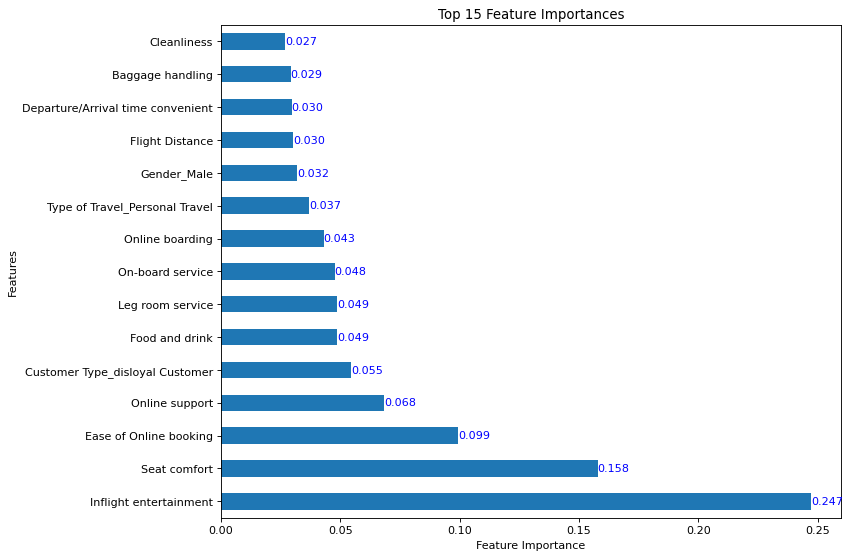

In [55]:
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

top_features = feat_importances.nlargest(15)

top_features.plot(kind='barh')

# Displaying the numerical values
for i, v in enumerate(top_features):
    plt.text(v, i, f"{v:.3f}", color='blue', va='center')

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 15 Feature Importances')

plt.show()

# Decision Tree Classifier

Training Accuracy: 0.9423602556205728
Test Accuracy: 0.9366338158299969
Precision: 0.9123427349724529
Recall: 0.9503211991434689
F1-score: 0.9309447893941936
AUC-ROC Score: 0.937890478601173


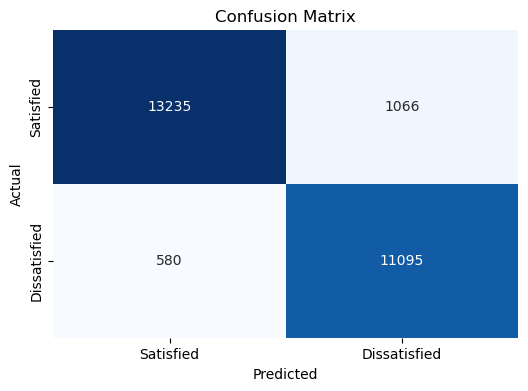

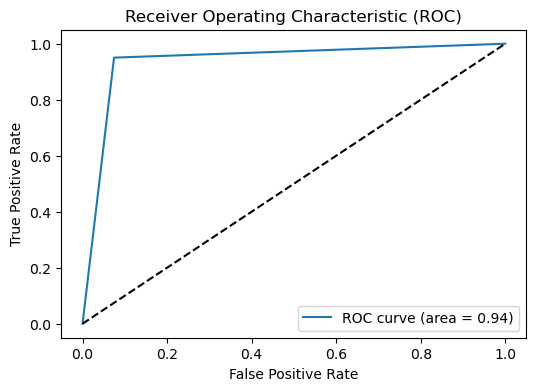

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

dt = DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_split=7, min_samples_leaf=5, random_state=42)
dt.fit(X_train, y_train)

y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
auc_roc = roc_auc_score(y_test, y_test_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC Score:", auc_roc)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Satisfied', 'Dissatisfied'], yticklabels=['Satisfied', 'Dissatisfied'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Compute the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
import numpy as np

model_comparison['DecisionTreeClassifier'] = [
    np.round(accuracy_score(y_train, y_train_pred), 2),
    np.round(accuracy_score(y_test, y_test_pred), 2),
    np.round(precision_score(y_test, y_pred), 2),
    np.round(recall_score(y_test, y_pred), 2),
    np.round(f1_score(y_test, y_pred), 2),
    np.round(roc_auc_score(y_test, y_pred), 2)
]


# Hyperparameter tuning of Decison Tree Classifier

In [57]:
import optuna
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Assuming you have X, y for your dataset

def objective(trial):
    # Define the hyperparameters to optimize
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    max_depth = trial.suggest_int('max_depth', 3, 15)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    min_impurity_decrease = trial.suggest_uniform('min_impurity_decrease', 0.0, 0.5)
    
    # Create an instance of DecisionTreeClassifier with the hyperparameters
    dt = DecisionTreeClassifier(
        criterion=criterion,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        min_impurity_decrease=min_impurity_decrease,
        random_state=42
    )
    
    # Split the data into train and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Fit the model on the training data
    dt.fit(X_train, y_train)
    
    # Make predictions on the validation data
    y_pred = dt.predict(X_val)
    
    # Calculate the evaluation metrics to optimize (accuracy)
    accuracy = accuracy_score(y_val, y_pred)
    
    # Store the accuracy value as a user attribute in the Optuna trial
    trial.set_user_attr('accuracy', accuracy)
    
    return accuracy

# Create an Optuna study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the corresponding best accuracy
best_params = study.best_params
best_accuracy = study.best_trial.user_attrs['accuracy']
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)


[I 2023-06-26 17:02:41,613] A new study created in memory with name: no-name-3d349a0e-01c5-4832-b31c-1ae7a2682f82
[I 2023-06-26 17:02:41,671] Trial 0 finished with value: 0.5494815727338056 and parameters: {'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'min_impurity_decrease': 0.1574019815956274}. Best is trial 0 with value: 0.5494815727338056.
[I 2023-06-26 17:02:41,728] Trial 1 finished with value: 0.5494815727338056 and parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'min_impurity_decrease': 0.10698035571807052}. Best is trial 0 with value: 0.5494815727338056.
[I 2023-06-26 17:02:41,787] Trial 2 finished with value: 0.5494815727338056 and parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'min_samples_leaf': 7, 'max_features': 'sqrt', 'min_impurity_decrease': 0.26335890178717236}. Best is trial 0 with value: 0.54948157273

[I 2023-06-26 17:02:43,819] Trial 28 finished with value: 0.5494815727338056 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 7, 'min_samples_leaf': 6, 'max_features': 'log2', 'min_impurity_decrease': 0.0822394425741572}. Best is trial 26 with value: 0.8473975977825685.
[I 2023-06-26 17:02:43,885] Trial 29 finished with value: 0.5494815727338056 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_features': 'log2', 'min_impurity_decrease': 0.15521881506853172}. Best is trial 26 with value: 0.8473975977825685.
[I 2023-06-26 17:02:43,957] Trial 30 finished with value: 0.5494815727338056 and parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2', 'min_impurity_decrease': 0.20242558798444657}. Best is trial 26 with value: 0.8473975977825685.
[I 2023-06-26 17:02:44,072] Trial 31 finished with value: 0.8101837593676214 and parameters: {'cri

[I 2023-06-26 17:02:46,437] Trial 56 finished with value: 0.723847654244944 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'min_impurity_decrease': 0.02464885245257439}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:46,557] Trial 57 finished with value: 0.8708808130582075 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_features': 'log2', 'min_impurity_decrease': 0.0002930333908212242}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:46,643] Trial 58 finished with value: 0.723847654244944 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'min_impurity_decrease': 0.052811052323360294}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:46,726] Trial 59 finished with value: 0.5494815727338056 and parameters: {'

[I 2023-06-26 17:02:49,143] Trial 84 finished with value: 0.723847654244944 and parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 8, 'min_samples_leaf': 9, 'max_features': 'log2', 'min_impurity_decrease': 0.03308960196555091}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:49,241] Trial 85 finished with value: 0.8062313930807925 and parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 6, 'max_features': 'log2', 'min_impurity_decrease': 0.013194381602958286}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:49,320] Trial 86 finished with value: 0.6660763781952571 and parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 7, 'min_samples_leaf': 8, 'max_features': 'log2', 'min_impurity_decrease': 0.07331612903913107}. Best is trial 46 with value: 0.8750898265065188.
[I 2023-06-26 17:02:49,403] Trial 87 finished with value: 0.723847654244944 and parameters: {'cri

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'log2', 'min_impurity_decrease': 0.0005436827515458967}
Best Accuracy: 0.8789138692126065


# KNN CLASSIFIER

Training Accuracy: 0.949183862026486
Test Accuracy: 0.9297428395441947
Precision: 0.9123427349724529
Recall: 0.9503211991434689
F1-score: 0.9309447893941936
AUC-ROC Score: 0.9741833599932439


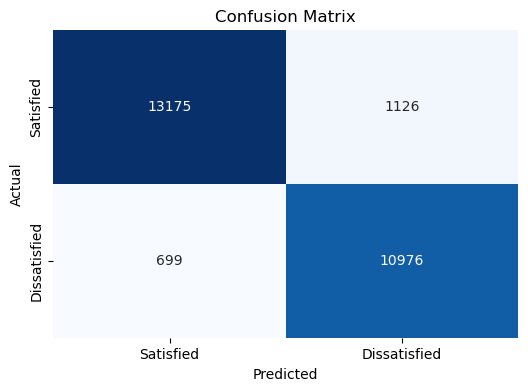

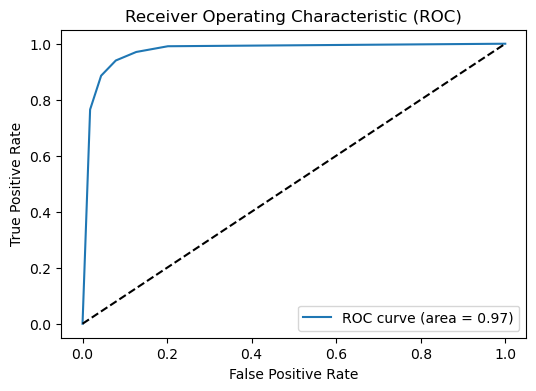

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set

y_pred = knn.predict(X_test)
# Calculate training and test accuracy
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
# Print the evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC Score:", auc_roc)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Set the class labels
class_labels = ['Satisfied', 'Dissatisfied']

# Create a heatmap of the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Calculate the probabilities for the positive class
y_pred_prob = knn.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
model_comparison['KNeighborsClassifier']=[round(knn.score(X_train, y_train), 2),round(knn.score(X_test, y_test), 2),round(precision_score(y_test, y_pred), 2), round(recall_score(y_test, y_pred), 2),round(f1_score(y_test, y_pred), 2), round(roc_auc_score(y_test, y_pred), 2)]

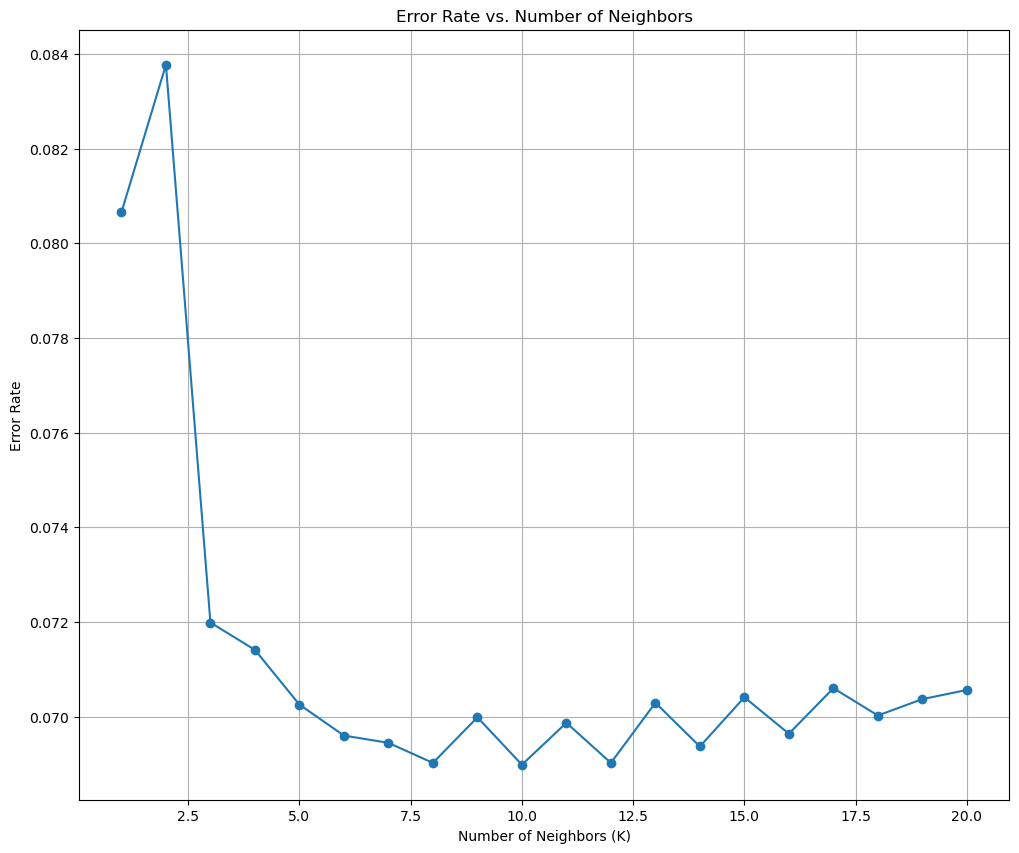

In [59]:
n_neighbors_range = range(1, 21)
error_rates = []
 
for n_neighbors in n_neighbors_range:
    
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate = np.mean(y_pred != y_test)
    error_rates.append(error_rate)

plt.plot(n_neighbors_range, error_rates, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neighbors')
plt.grid(True)
plt.show()


The lowest error rate is at k=5,so the best accuracy will be at k=5

# MODEL COMAPARISON

In [74]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Training Accuracy','Test Accuracy','Precison','Recall','F1 Score','AUC-ROC Score']

In [81]:
# Sort the DataFrame based on the desired evaluation metric
Model_com_df = Model_com_df.sort_values(by='Test Accuracy', ascending=False)  # Modify the column name as per your desired metric

# Format the DataFrame
formatted_df = Model_com_df.style.format({
    'Training Accuracy': "{:.2}",
    'Test Accuracy': "{:.2}",
    'Precision': "{:.2}",
    'Recall': "{:.2}",
    'F1-score': "{:.2}",
    'AUC-ROC Score': "{:.2}"
}).background_gradient(cmap='RdYlBu_r')

# Display the formatted DataFrame
formatted_df

,Training Accuracy,Test Accuracy,Precison,Recall,F1 Score,AUC-ROC Score
RandomForestClassifier,0.97,0.95,0.940000,0.95,0.940000,0.95
DecisionTreeClassifier,0.94,0.94,0.940000,0.95,0.940000,0.95
KNeighborsClassifier,0.95,0.93,0.910000,0.94,0.920000,0.93
LogisticRegression,0.83,0.83,0.810000,0.81,0.810000,0.83
